In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
train_identity = pd.read_csv('./IEEE-CIS_Fraud_Detection/train_identity.csv')
train_transaction = pd.read_csv('./IEEE-CIS_Fraud_Detection/train_transaction.csv')
train_transaction.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
train_identity.head(5)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


# Identity data
## TransactionID is core(a subset of TranID in TranData.csv)
id01 to id11 are numerical features for identity, which is collected by Vesta and security partners such as device rating, ip_domain rating, proxy rating, etc. Also it recorded behavioral fingerprint like account login times/failed to login times, how long an account stayed on the page, etc. All of these are not able to elaborate due to security partner T&C. I hope you could get basic meaning of these features, and by mentioning them as numerical/categorical, you won't deal with them inappropriately.”

# Transaction data

## Basic data

### Fraud labeling
Yes, they're all real data, no synthetic data. The logic of our labeling is define reported chargeback on the card as fraud transaction (isFraud=1) and transactions posterior to it with either user account, email address or billing address directly linked to these attributes as fraud too. If none of above is reported and found beyond 120 days, then we define as legit transaction (isFraud=0).

from:https://www.kaggle.com/c/ieee-fraud-detection/discussion/101203#588953

In [17]:
print("Shape of transaction data is {}".format(train_transaction.shape))
print("Shape of identity data is {}".format(train_identity.shape))


get_fraud_frac = lambda series: 100 * sum(series)/len(series)
print("Percent fraud for train transactions: {}".format(get_fraud_frac(train_transaction.isFraud[:train_transaction.shape[0]])))
print("Percent : {}".format())

Shape of transaction data is (590540, 394)
Shape of identity data is (144233, 41)
Percent fraud for train transactions: 3.499000914417313


### Name of all columns

In [22]:
print(list(train_transaction.columns))

['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V

### TransactionDT: timedelta from a given reference datetime (not an actual timestamp)

 “TransactionDT first value is 86400, which corresponds to the number of seconds in a day (60 * 60 * 24 = 86400) so I think the unit is seconds. Using this, we know the data spans 6 months, as the maximum value is 15811131, which would correspond to day 183.”

In [33]:
train_transaction.TransactionDT

0            86400
1            86401
2            86469
3            86499
4            86506
            ...   
590535    15811047
590536    15811049
590537    15811079
590538    15811088
590539    15811131
Name: TransactionDT, Length: 590540, dtype: int64

### Other columns
both addresses are for purchaser  
addr1 as billing region  
addr2 as billing country”  
dist: distance:
"distances between (not limited) billing address, mailing address, zip code, IP address, phone area, etc.”  
card1-6: payment card information, such as card type, card category, issue bank, country, etc.  
P_ and (R__) emaildomain: purchaser and recipient email domain
“ certain transactions don't need recipient, so R_emaildomain is null.”  
  
C1-C14:counts of phone numbers, email addresses, names, device, ipaddr, billingaddr for both purchaser and recipient  
D1-D15: timedelta, such as days between previous transaction, etc.  
M1-M9: match, such as names on card and address, etc.  
Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.  
  
"All Vesta features were derived as numerical. some of them are count of orders within a clustering, a time-period or condition, so the value is finite and has ordering (or ranking). I wouldn't recommend to treat any of them as categorical. If any of them resulted in binary by chance, it maybe worth trying."

In [62]:
count = train_transaction['addr2'].isna().sum()
print('Percent Nan:{}'.format(100 * count/train_transaction.shape[0]))
addr2 = train_transaction.addr2
addr2.fillna(value=0,inplace=True)

Percent Nan:11.12642666034477


In [64]:
addr2.value_counts()

87.0    520481
0.0      65706
60.0      3084
96.0       638
32.0        91
         ...  
25.0         1
22.0         1
15.0         1
35.0         1
93.0         1
Name: addr2, Length: 75, dtype: int64

In [65]:
train_transaction.addr1.value_counts()

299.0    46335
325.0    42751
204.0    42020
264.0    39870
330.0    26287
         ...  
386.0        1
101.0        1
353.0        1
516.0        1
245.0        1
Name: addr1, Length: 332, dtype: int64

<AxesSubplot:>

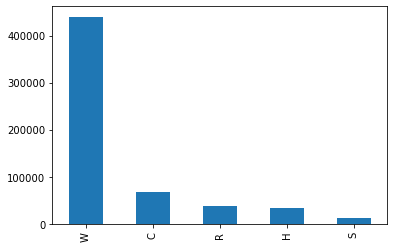

In [30]:
train_transaction.ProductCD.value_counts().plot(kind='bar')

ref:  
    1.https://zhuanlan.zhihu.com/p/85947569  
    2.https://blog.csdn.net/weixin_46462381/article/details/108971868  
    3.https://blog.csdn.net/lj2048/article/details/106259844